In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('/data/zhicai/code/Diff-Mix/')
from utils import parse_result


target_dir = '../outputs/result/main_result_5shot'
dataset='cub'

orig_ds = parse_result(target_dir, extra_column=['nepoch'])
ds=orig_ds[(orig_ds['dataset']==dataset) ]

ds.columns = [''.join(col).strip() for col in ds.columns.values]
ds_baseline = ds[ds['strategy']=='baseline']
ds_realgen = ds[ds['strategy']=='realgen']
ds_gen = ds[ds['strategy']=='gen']
try:
    ds.drop(ds_baseline.index,inplace=True)
    ds.drop( ds_realgen.index,inplace=True)
    ds.drop(ds_gen.index,inplace=True)
except KeyError:
    print('Removed') 
# ds_pivot = ds.pivot(index=['strength'], columns='strategy', values='accmean')
# sns.lineplot(x='strength', y='accmean', hue='strategy', data=ds_pivot, ci=None)
# ds = ds.pivot(index=['strength'], columns='strategy', values='accmean',)
ds.pivot(index=['strength','soft power','nepoch'], columns='strategy', values='accmean')
# ds

2023-11-26 15:01:03.520849: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/tmp/ipykernel_318223/2985052302.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.drop(ds_baseline.index,inplace=True)
/tmp/ipykernel_318223/2985052302.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds.drop( ds_realgen.index,inplace=True)
/tmp/ipykernel_318223/2985052302.py:21: SettingWithCopyWarning: 
A value is tryi

,,strategy,aug,mixup,realaug,realmixup
strength,soft power,nepoch,,,,
0.1,0.5,100,51.380000,50.626667,50.986667,50.450000
0.3,0.5,100,51.653333,51.173333,50.816667,50.023333
0.5,0.5,100,52.490000,52.863333,49.303333,50.973333
0.7,0.5,100,54.930000,57.566667,50.793333,53.743333
0.9,0.5,100,57.546667,59.416667,51.933333,53.963333
1.0,0.5,100,57.910000,59.576667,52.363333,53.760000


In [11]:
ds_gen

,dataset,resolution,lr,strength,strategy,soft power,nepoch,accmean,accvar


In [20]:
ds=ds[ds['soft power']==0.5]
ds_mean = ds.pivot(index=['strength'], columns='strategy', values='accmean')
ds_var = ds.pivot(index=['strength'], columns='strategy', values='accvar')

In [21]:
ds_mean

strategy,aug,mixup,realaug,realmixup
strength,,,,
0.1,81.566667,82.086667,81.660000,81.700000
0.3,81.700000,82.910000,81.090000,82.440000
0.5,81.583333,82.760000,80.076667,82.443333
0.7,81.485000,82.660000,80.206667,81.146667
0.9,81.860000,82.203333,80.973333,81.410000
1.0,81.775000,82.246667,NaN,NaN


/tmp/ipykernel_801916/2697745089.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=mean_values.index, y=mean_values.values, label=label_name, marker=marker,ci=None)
/tmp/ipykernel_801916/2697745089.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=mean_values.index, y=mean_values.values, label=label_name, marker=marker,ci=None)
/tmp/ipykernel_801916/2697745089.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=mean_values.index, y=mean_values.values, label=label_name, marker=marker,ci=None)
/tmp/ipykernel_801916/2697745089.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=mean_values.index, y=mean_values.values, label=label_name, marker=marker,ci=None)


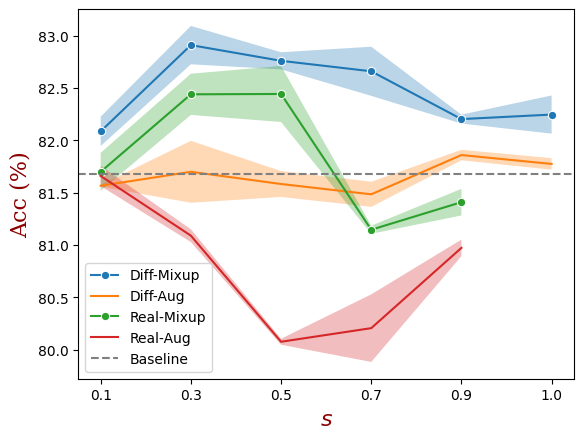

In [22]:
font = {'family': 'serif',
    'color':  'darkred',
    'weight': 'normal',
    'size': 16,
    }

for strategy,label_name,marker in zip(['mixup','aug','realmixup','realaug'],['Diff-Mixup','Diff-Aug','Real-Mixup','Real-Aug'],['o','','o','']):
    mean_values = ds_mean[strategy]
    var_values = ds_var[strategy]
    sns.lineplot(x=mean_values.index, y=mean_values.values, label=label_name, marker=marker,ci=None)
    plt.fill_between(mean_values.index, mean_values - 2.5*var_values, mean_values + 2.5*var_values, alpha=0.3)
plt.axhline(y=ds_baseline['accmean'].mean(), color='gray', linestyle='--', label='Baseline')
plt.xlabel('$s$',fontdict=font)
plt.ylabel(ylabel='Acc (%)',fontdict=font)
plt.legend()
plt.savefig('../figures/results_cub_all.pdf',bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
font = {'family': 'serif',
        'font': 'Time New Roman',
        'weight': 'normal',
        'size': 16,
        }
# 示例数据
# 示例数据
x = [0.05 ,0.1	 ,0.3	 ,0.5	 ,0.7	 ,0.9]
y = [82.540,82.895,82.610,80.580,79.220,75.340]

# 画折线图
plt.plot(x, y, marker='o', ms=10,linestyle='-', color='#FECDA6', label='Diff-Mix')
# plt.plot(x, y2, marker='s', ms=10, linestyle='-', color='#9BBEC8', label='Diff-Reg')
plt.axhline(y=81.60, linestyle='--', color='gray', label='Baseline')
# 添加标签和标题
plt.xlabel('Synthetic ratio',fontdict=font)
plt.ylabel('Acc(%)',fontdict=font)

# 显示图例
plt.legend(fontsize=12)

# 显示图形
plt.show()


In [ ]:
import matplotlib.pyplot as plt
font = {'family': 'serif',
        'font': 'Time New Roman',
        'weight': 'normal',
        'size': 16,
        }
# 示例数据
categories = ['2X', '4X', '6X', '8X', '10X']
values = [82.74, 82.93, 83.08, 83.15, 83.47]

# 创建带有正负值的条形图
plt.bar(categories, values, color=['#9FBB73' for v in values])

# 添加标签和标题
import matplotlib.pyplot as plt

# 示例数据
categories = ['2X', '4X', '6X', '8X', '10X']
values = [82.74, 82.93, 83.08, 83.15, 83.47]
threshold = 81.60

# 创建带有正负值的条形图
bars = plt.bar(categories, values, color=['#9FBB73'])

# 添加标签和标题
plt.xlabel('Synthetic data size',fontdict=font)
plt.ylabel('Acc (%)',fontdict=font)

# 在纵坐标上添加虚线
plt.axhline(y=threshold, linestyle='--', color='gray', label='Baseline')

# 设置纵坐标刻度范围
plt.ylim(81, 84)

# 设置纵坐标刻度
plt.yticks(range(81, 84))

# 在每个条形上方显示相对于81.60增加了多少
for bar in bars:
    height = bar.get_height()
    difference = height - threshold
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'+{difference:.2f}', ha='center', color='black',fontsize=12)

# 显示图例
plt.legend(fontsize=12)

# 显示图形
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = [29, 29, 28, 27, 27, 26, 26, 25, 24, 24, 23, 23, 22, 22, 21, 21, 20, 20, 19, 19, 18, 18, 17, 17, 17, 16, 16, 15, 15, 15, 14, 14, 14, 13, 13, 13, 12, 12, 12, 12, 11, 11, 11, 11, 10, 10, 10, 10, 9, 9, 9, 9, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# 补齐数据
max_value = 29
data += [0] * (max_value - len(data))

# 绘制柱状图
colors = ['orange' if x > 0 else 'white' for x in data]  # 用橙色表示非零值
indices = np.arange(1, max_value + 1)
plt.bar(indices, data, color=colors)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

plt.show()
